In [42]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from geopy.geocoders import Nominatim
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [43]:
crime = pd.read_csv("37-00049_UOF-P_2016_prepped.csv")
crime = crime.loc[1:, :]
crime.head()

INCIDENT_DATE INCIDENT_TIME     UOF_NUMBER OFFICER_ID OFFICER_GENDER OFFICER_RACE OFFICER_HIRE_DATE OFFICER_YEARS_ON_FORCE OFFICER_INJURY           OFFICER_INJURY_TYPE OFFICER_HOSPITALIZATION SUBJECT_ID SUBJECT_RACE SUBJECT_GENDER SUBJECT_INJURY           SUBJECT_INJURY_TYPE SUBJECT_WAS_ARRESTED  SUBJECT_DESCRIPTION           SUBJECT_OFFENSE REPORTING_AREA BEAT SECTOR       DIVISION LOCATION_DISTRICT STREET_NUMBER   STREET_NAME STREET_DIRECTION STREET_TYPE LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION LOCATION_CITY LOCATION_STATE LOCATION_LATITUDE LOCATION_LONGITUDE INCIDENT_REASON REASON_FOR_FORCE    TYPE_OF_FORCE_USED1 TYPE_OF_FORCE_USED2 TYPE_OF_FORCE_USED3 TYPE_OF_FORCE_USED4 TYPE_OF_FORCE_USED5 TYPE_OF_FORCE_USED6 TYPE_OF_FORCE_USED7 TYPE_OF_FORCE_USED8 TYPE_OF_FORCE_USED9 TYPE_OF_FORCE_USED10 NUMBER_EC_CYCLES FORCE_EFFECTIVE
1        9/3/16    4:14:00 AM          37702      10810           Male        Black            5/7/14                      2             No  No injuries noted or visible                      No      46424        Black         Female            Yes       Non-Visible Injury/Pain                  Yes    Mentally unstable                     APOWW           2062  134    130        CENTRAL               D14           211         Ervay                N         St.                               211 N ERVAY ST        Dallas             TX         32.782205         -96.797461          Arrest           Arrest  Hand/Arm/Elbow Strike                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN              NaN             Yes
2       3/22/16   11:00:00 PM          33413       7706           Male        White            1/8/99                     17            Yes                 Sprain/Strain                     Yes      44324     Hispanic           Male             No  No injuries noted or visible                  Yes    Mentally unstable                     APOWW           1197  237    230      NORTHEAST                D9          7647      Ferguson              NaN         Rd.                             7647 FERGUSON RD        Dallas             TX         32.798978         -96.717493          Arrest           Arrest            Joint Locks                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN              NaN             Yes
3       5/22/16    1:29:00 PM          34567      11014           Male        Black           5/20/15                      1             No  No injuries noted or visible                      No      45126     Hispanic           Male             No  No injuries noted or visible                  Yes              Unknown                     APOWW           4153  432    430      SOUTHWEST                D6           716  bimebella dr              NaN         Ln.                             716 BIMEBELLA LN        Dallas             TX          32.73971          -96.92519          Arrest           Arrest      Take Down - Group                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN              NaN             Yes
4       1/10/16    8:55:00 PM          31460       6692           Male        Black           7/29/91                     24             No  No injuries noted or visible                      No      43150     Hispanic           Male            Yes                Laceration/Cut                  Yes  FD-Unknown if Armed            Evading Arrest           4523  641    640  NORTH CENTRAL               D11          5600           LBJ              NaN       Frwy.                               5600 L B J FWY        Dallas             TX               NaN                NaN          Arrest           Arrest         K-9 Deploym

In [44]:
crime.shape[0]

2383

In [59]:
race_cols = ["INCIDENT_DATE", "INCIDENT_TIME", "SUBJECT_ID", "SUBJECT_RACE", "SUBJECT_GENDER", "SUBJECT_INJURY", 
            "SUBJECT_INJURY_TYPE", "SUBJECT_WAS_ARRESTED", "SUBJECT_DESCRIPTION", "SUBJECT_OFFENSE", "LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION",
            "INCIDENT_REASON", "REASON_FOR_FORCE", "TYPE_OF_FORCE_USED1", "TYPE_OF_FORCE_USED2", "TYPE_OF_FORCE_USED3", "TYPE_OF_FORCE_USED4", 
            "TYPE_OF_FORCE_USED5", "TYPE_OF_FORCE_USED6", "TYPE_OF_FORCE_USED7", "TYPE_OF_FORCE_USED8", "TYPE_OF_FORCE_USED9", "TYPE_OF_FORCE_USED10", "FORCE_EFFECTIVE",
            "OFFICER_ID", "OFFICER_RACE", "OFFICER_YEARS_ON_FORCE",]
race = crime[race_cols]
race = race.loc[~race["SUBJECT_RACE"].isnull(), :]

In [60]:
race

INCIDENT_DATE INCIDENT_TIME SUBJECT_ID SUBJECT_RACE SUBJECT_GENDER SUBJECT_INJURY                                SUBJECT_INJURY_TYPE SUBJECT_WAS_ARRESTED         SUBJECT_DESCRIPTION                                    SUBJECT_OFFENSE LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION        INCIDENT_REASON          REASON_FOR_FORCE       TYPE_OF_FORCE_USED1       TYPE_OF_FORCE_USED2       TYPE_OF_FORCE_USED3     TYPE_OF_FORCE_USED4     TYPE_OF_FORCE_USED5    TYPE_OF_FORCE_USED6       TYPE_OF_FORCE_USED7 TYPE_OF_FORCE_USED8 TYPE_OF_FORCE_USED9 TYPE_OF_FORCE_USED10                                FORCE_EFFECTIVE OFFICER_ID  OFFICER_RACE OFFICER_YEARS_ON_FORCE
1           9/3/16    4:14:00 AM      46424        Black         Female            Yes                            Non-Visible Injury/Pain                  Yes           Mentally unstable                                              APOWW                               211 N ERVAY ST                 Arrest                    Arrest     Hand/Arm/Elbow Strike                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes      10810         Black                      2
2          3/22/16   11:00:00 PM      44324     Hispanic           Male             No                       No injuries noted or visible                  Yes           Mentally unstable                                              APOWW                             7647 FERGUSON RD                 Arrest                    Arrest               Joint Locks                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes       7706         White                     17
3          5/22/16    1:29:00 PM      45126     Hispanic           Male             No                       No injuries noted or visible                  Yes                     Unknown                                              APOWW                             716 BIMEBELLA LN                 Arrest                    Arrest         Take Down - Group                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes      11014         Black                      1
4          1/10/16    8:55:00 PM      43150     Hispanic           Male            Yes                                     Laceration/Cut                  Yes         FD-Unknown if Armed                                     Evading Arrest                               5600 L B J FWY                 Arrest                    Arrest            K-9 Deployment                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes       6692         Black                     24
5          11/8/16    2:30:00 AM      47307        Black           Male             No                       No injuries noted or visible                  Yes                     Unknown                           Other Misdemeanor Arrest                        4600 S MALCOLM X BLVD                 Arrest                    Arrest            Verbal Command           Take Down - Arm                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                        No, Yes       9844         White                      7
6          9/11/16    7:20:

# Race Counts 

In [61]:
race.groupby("SUBJECT_RACE").count().transpose()

SUBJECT_RACE                                  American Ind  Asian  Black  Hispanic  Other  White
INCIDENT_DATE                                            1      5   1333       524     11    470
INCIDENT_TIME                                            1      5   1326       524     11    467
SUBJECT_ID                                               1      5   1333       524     11    470
SUBJECT_GENDER                                           1      5   1333       524     11    470
SUBJECT_INJURY                                           1      5   1333       524     11    470
SUBJECT_INJURY_TYPE                                      1      5   1333       524     11    470
SUBJECT_WAS_ARRESTED                                     1      5   1333       524     11    470
SUBJECT_DESCRIPTION                                      1      5   1302       496     11    461
SUBJECT_OFFENSE                                          1      5   1333       524     11    470
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION             1      5   1333       524     11    470
INCIDENT_REASON                                          1      5   1327       519     11    470
REASON_FOR_FORCE                                         1      5   1327       519     11    470
TYPE_OF_FORCE_USED1                                      1      5   1333       524     11    470
TYPE_OF_FORCE_USED2                                      1      5    924       365      7    311
TYPE_OF_FORCE_USED3                                      0      3    485       215      2    159
TYPE_OF_FORCE_USED4                                      0      2    224        99      1     58
TYPE_OF_FORCE_USED5                                      0      0     88        40      0     27
TYPE_OF_FORCE_USED6                                      0      0     30        15      0     15
TYPE_OF_FORCE_USED7                                      0      0     12         6      0      4
TYPE_OF_FORCE_USED8                                      0      0      1         3      0      1
TYPE_OF_FORCE_USED9                                      0      0      0         0      0      1
TYPE_OF_FORCE_USED10                                     0      0      0         0      0      1
FORCE_EFFECTIVE                                          1      5   1333       524     11    470
OFFICER_ID                                               1      5   1333       524     11    470
OFFICER_RACE                                             1      5   1333       524     11    470
OFFICER_YEARS_ON_FORCE                                   1      5   1333       524     11    470

Crime in Dallas: 
- Not surprisingly, Blacks are arrested the most, 3 times more arrest than whites, Hispanic is also not surprisingly the second most arrested race. 

# Use of Force

In [62]:
race.columns[13]

'TYPE_OF_FORCE_USED1'

In [63]:
race.TYPE_OF_FORCE_USED1.unique()

array(['Hand/Arm/Elbow Strike', 'Joint Locks', 'Take Down - Group',
       'K-9 Deployment', 'Verbal Command', 'Hand Controlled Escort',
       'Weapon display at Person', 'Held Suspect Down', 'BD - Grabbed',
       'BD - Pushed', 'Handcuffing Take Down', 'Taser', 'Take Down - Arm',
       'Other Impact Weapon', 'Feet/Leg/Knee Strike', 'Pressure Points',
       'Taser Display at Person', 'BD - Tripped', 'Take Down - Head',
       'Take Down - Body', 'Leg Restraint System', 'OC Spray',
       'Pepperball Impact', 'Combat Stance', 'Baton Display',
       'Baton Strike/Open Mode', 'Baton Strike/Closed Mode', 'LVNR',
       'Pepperball Saturation'], dtype=object)

In [64]:
type_of_force = [] 
for i in range(13, 23): 
    type_of_force = type_of_force + race.iloc[:, i].unique().astype("str").tolist()
    #race.TYPE_OF_FORCE_USED1.unique().tolist()
type_of_force = list(set(type_of_force))[1:]
type_of_force = type_of_force[:11] + type_of_force[12:]

In [65]:
#"Verbal Command" 
force = race.iloc[:, 13].astype('str')
for i in range(14, 23):
    force = force.astype("str") + "," + race.iloc[:, i].astype("str")
race["force"] = force

In [66]:
for i in type_of_force:
    race[i] = race["force"].str.contains(i)

- higher percentage of hispanic frisked and gone to detention than blacks and whites. Blacks and whites have about the same proportion of detention and frisk. 
- weapon displayed more for black and hispanics than whites 
- hispanics have the highest take down for their arm 
- hispanics have lowest danger to self or others
- blacks have the highest arrest, hispanics surprisingly have lowest arrest, proportion of blacks and whites arrested surprisingly similar 
- taser display at person goes from blacks, latino, to white for highest to lowest 
- white have highest oc spray (pepper spray?) 
- blacks only race with baton strike 

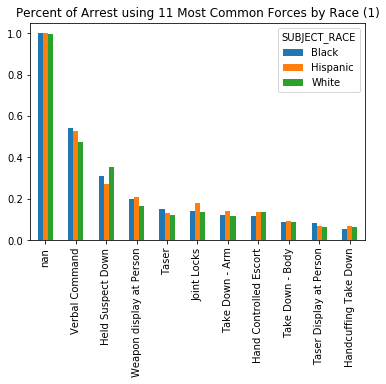

In [67]:
type_of_force_prop = race.groupby("SUBJECT_RACE")[type_of_force].agg(lambda x: np.sum(x)/len(x)).transpose()
type_of_force_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[0:11, :].plot(kind= "bar");
plt.title("Percent of Arrest using 11 Most Common Forces by Race (1)");

- A lot of varying race and types of forces used
    - Black people more likely to receive a verbal command, taser, taser display 
    - Latino people more likely to get weapon display, grabbed, taken down by the arm and body
    - White people more likely to be held down, hand controlled escort. Severe physical force not used as often 

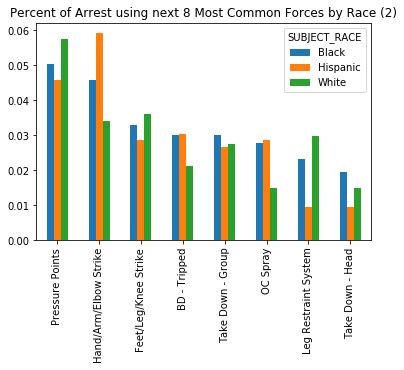

In [68]:
type_of_force_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[11:19, :].plot(kind= "bar");
plt.title("Percent of Arrest using next 8 Most Common Forces by Race (2)");

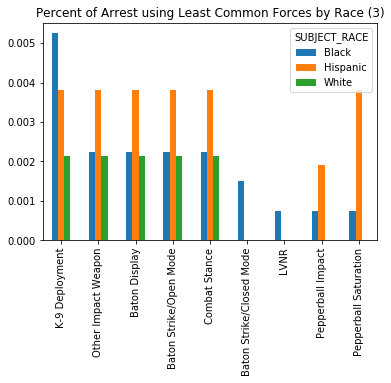

In [71]:
type_of_force_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[19:, :].plot(kind= "bar")
plt.title("Percent of Arrest using Least Common Forces by Race (3)");

In [72]:
type_of_force_prop

SUBJECT_RACE              American Ind  Asian     Black  Hispanic     Other     White
Handcuffing Take Down              0.0    0.0  0.054014  0.066794  0.000000  0.065957
Verbal Command                     0.0    0.6  0.543136  0.526718  0.454545  0.474468
Pepperball Impact                  0.0    0.0  0.000750  0.001908  0.000000  0.000000
Feet/Leg/Knee Strike               0.0    0.0  0.033008  0.028626  0.090909  0.036170
Hand/Arm/Elbow Strike              0.0    0.0  0.045761  0.059160  0.000000  0.034043
Taser                              0.0    0.2  0.152288  0.129771  0.272727  0.121277
Pepperball Saturation              0.0    0.0  0.000750  0.003817  0.000000  0.000000
Pressure Points                    0.0    0.0  0.050263  0.045802  0.000000  0.057447
Take Down - Arm                    0.0    0.0  0.123031  0.143130  0.090909  0.119149
BD - Tripped                       0.0    0.0  0.030008  0.030534  0.000000  0.021277
Held Suspect Down                  0.0    0.4  0.312078  0.272901  0.090909  0.353191
nan                                1.0    1.0  1.000000  1.000000  1.000000  0.997872
Baton Strike/Closed Mode           0.0    0.0  0.001500  0.000000  0.000000  0.000000
Combat Stance                      0.0    0.0  0.002251  0.003817  0.000000  0.002128
Hand Controlled Escort             0.0    0.4  0.117779  0.135496  0.000000  0.136170
LVNR                               0.0    0.0  0.000750  0.000000  0.000000  0.000000
Leg Restraint System               0.0    0.0  0.023256  0.009542  0.000000  0.029787
K-9 Deployment                     1.0    0.0  0.005251  0.003817  0.000000  0.002128
Baton Strike/Open Mode             0.0    0.2  0.002251  0.003817  0.000000  0.002128
Taser Display at Person            0.0    0.0  0.084771  0.070611  0.090909  0.065957
Take Down - Group                  0.0    0.0  0.030008  0.026718  0.000000  0.027660
OC Spray                           0.0    0.0  0.027757  0.028626  0.000000  0.014894
Weapon display at Person           1.0    0.4  0.198800  0.208015  0.363636  0.165957
Joint Locks                        0.0    0.6  0.141785  0.179389  0.272727  0.136170
Take Down - Head                   0.0    0.0  0.019505  0.009542  0.090909  0.014894
Other Impact Weapon                0.0    0.0  0.002251  0.003817  0.000000  0.002128
Take Down - Body                   0.0    0.0  0.086272  0.091603  0.000000  0.087234
Baton Display                      0.0    0.0  0.002251  0.003817  0.000000  0.002128

# Injuries by race

In [73]:
race.groupby(["SUBJECT_RACE", "SUBJECT_INJURY"]).count()

INCIDENT_DATE  INCIDENT_TIME  SUBJECT_ID  SUBJECT_GENDER  SUBJECT_INJURY_TYPE  SUBJECT_WAS_ARRESTED  SUBJECT_DESCRIPTION  SUBJECT_OFFENSE  LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION  INCIDENT_REASON  REASON_FOR_FORCE  TYPE_OF_FORCE_USED1  TYPE_OF_FORCE_USED2  TYPE_OF_FORCE_USED3  TYPE_OF_FORCE_USED4  TYPE_OF_FORCE_USED5  TYPE_OF_FORCE_USED6  TYPE_OF_FORCE_USED7  TYPE_OF_FORCE_USED8  TYPE_OF_FORCE_USED9  TYPE_OF_FORCE_USED10  FORCE_EFFECTIVE  OFFICER_ID  OFFICER_RACE  OFFICER_YEARS_ON_FORCE  force  Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down  nan  Baton Strike/Closed Mode  Combat Stance  Hand Controlled Escort  LVNR  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  Take Down - Group  OC Spray  Weapon display at Person  Joint Locks  Take Down - Head  \
SUBJECT_RACE SUBJECT_INJURY                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
American Ind No                          1              1           1               1                    1                     1                    1                1                                             1                1                 1                    1                    1                    0                    0                    0                    0                    0                    0                    0                     0                1           1             1                       1      1                      1               1                  1                     1                      1      1                      1                1                1             1                  1    1                         1              1                       1     1                     1               1                       1                        1                  1         1                         1            1                 1   
Asian        No                          5              5           5               5                    5                     5                    5                5                                             5                5                 5                    5                    5                    3                    2                    0                    0                    0                    0                    0                     0                5           5             5                       5      5                      5               5                  5                     5                      5      5                      5                5                5             5                  5    5                         5              5                       5     5                     5               5                       5                        5                  5         5                         5            5                 5   
Black        No                        999            993         999             999    

In [74]:
print("% blacks injured: " + str(334/1333))
print("% hispanic injured: " + str(126/524))
print("% white injured: " + str(151/319))

% blacks injured: 0.25056264066016504
% hispanic injured: 0.24045801526717558
% white injured: 0.47335423197492166


White people more likely to get injured

# Looking at the offenses by different race 

In [75]:
offenses = pd.Series([y.strip() for x in race.SUBJECT_OFFENSE.str.split(",").tolist() for y in x]).unique()
offenses

array(['APOWW', 'Evading Arrest', 'Other Misdemeanor Arrest',
       'Assault/FV', 'Assault', 'DWI', 'Resisting Search and Transport',
       'Resisting Arrest', 'Other Felony Arrest', 'No Arrest',
       'Drug Possession - Misdemeanor', 'Warrant/Hold',
       'Assault/Public Servant', 'Public Intoxication', 'Fail to ID',
       'Crim Trespass/Bldg/Prop', 'Drug Possession - Felony', 'Theft',
       'DWLI', 'Burglary of a Vehicle', 'Escape', 'Criminal Mischief',
       'Unauthorize Use Vehicle', 'Burglary/Habitation', 'Robbery',
       'Disorderly Conduct', 'DWLS', 'Man/Del/Dangerous Drug',
       'Manifest/Drug Sales', 'Traffic Violation', 'Take Weapon from PO',
       'Discharge Firearm', 'Curfew Violation', 'Burglary/Building',
       'Pedestrian In Roadway', 'Other Agency Arrest',
       'Crim Trespass/Hab/Weapon', 'Prostitution', 'Sleeping in Public',
       'City Ordinance Violation', 'Deadly Conduct', 'Murder',
       'Sexual Assault', 'Burglary', 'DUI'], dtype=object)

In [76]:
offenses = ['APOWW', 'Evading Arrest', 'Other Misdemeanor Arrest',
       'Assault', 'DWI', 'Resisting Search and Transport',
       'Resisting Arrest', 'Other Felony Arrest', 'No Arrest',
       'Drug Possession', 'Warrant/Hold',
       'Public Intoxication', 'Fail to ID',
       'Crim Trespass', 'Theft',
       'DWLI', 'Burglary', 'Escape', 'Criminal Mischief',
       'Unauthorize Use Vehicle', 'Robbery',
       'Disorderly Conduct', 'DWLS', 'Man/Del/Dangerous Drug',
       'Manifest/Drug Sales', 'Traffic Violation', 'Take Weapon from PO',
       'Discharge Firearm', 'Curfew Violation', 
       'Pedestrian In Roadway', 'Other Agency Arrest',
       'Prostitution', 'Sleeping in Public',
       'City Ordinance Violation', 'Deadly Conduct', 'Murder',
       'Sexual Assault', 'DUI']
for i in offenses:
    race[i] = race["SUBJECT_OFFENSE"].str.contains(i)

In [77]:
race[offenses].apply(lambda x: sum(x), axis = 0).sort_values(ascending = False)

Assault                           462
Warrant/Hold                      461
Resisting Arrest                  391
APOWW                             364
Public Intoxication               334
No Arrest                         295
Evading Arrest                    284
Drug Possession                   237
Other Felony Arrest               172
Other Misdemeanor Arrest          148
Resisting Search and Transport    147
Burglary                           87
Fail to ID                         83
Crim Trespass                      62
DWI                                58
Criminal Mischief                  49
Disorderly Conduct                 44
Theft                              35
Unauthorize Use Vehicle            35
Robbery                            31
Traffic Violation                  30
Man/Del/Dangerous Drug             15
Escape                             11
Take Weapon from PO                 9
DWLI                                9
Other Agency Arrest                 7
Prostitution

Most common offenses are Assault and Warrant/Hold, followed by APOWW (Apprehension by Peace Officer Without Warrant) and Public Intoxication 

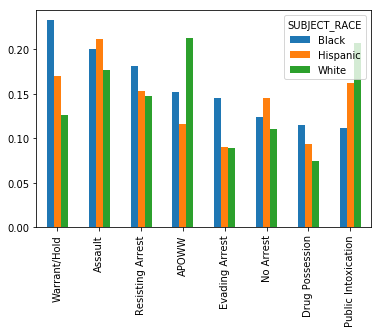

In [78]:
plt.figure
offenses_prop = race.groupby("SUBJECT_RACE")[offenses].agg(lambda x: np.sum(x)/len(x)).transpose()
offenses_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[0:8, :].plot(kind= "bar");


- Black more likely to have a warrant/hold for their arrest, resist arrest, evading arrest, arrested for drug possession, least likely to be publicly intoxicated 
- Latino more likley to be be involved in assault
- White men less likely to be arrested for everything except for Apprehension by Peace Officer without warrent, and public intoxication 

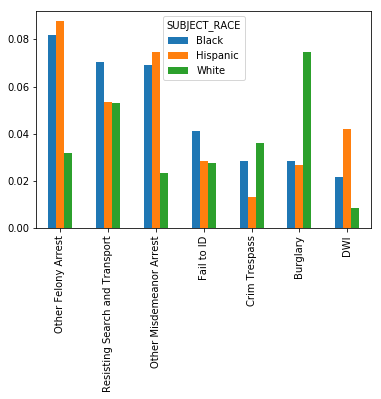

In [79]:
offenses_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[8:15, :].plot(kind= "bar");


- Black more likely to resist search and transport, a lot of resisting arrest or searches from their end 
- Most likely to be arrested for felony and other misdemeanor acts, least likely to trespass, most likely to be driving while impaired. 
- Most likley to be arrested for trespassing and burglarly 

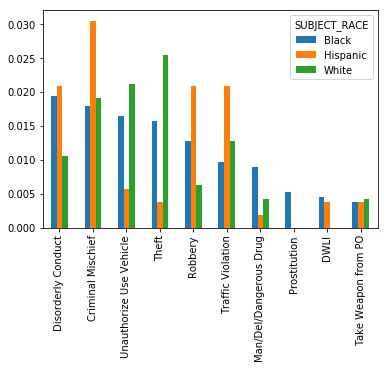

In [80]:
offenses_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[15:25, :].plot(kind= "bar");


- Black only race arrested for prositution 


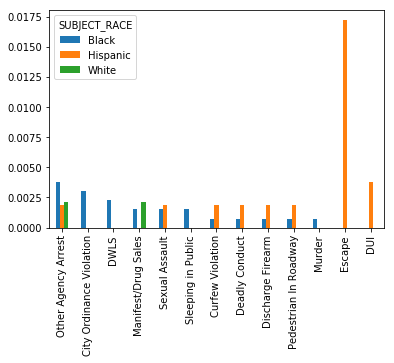

In [81]:
offenses_prop.sort_values("Black", ascending = False)[["Black", "Hispanic", "White"]].iloc[25:, :].plot(kind= "bar");


In [82]:
race[race.REASON_FOR_FORCE.isnull()]

INCIDENT_DATE INCIDENT_TIME SUBJECT_ID SUBJECT_RACE SUBJECT_GENDER SUBJECT_INJURY                SUBJECT_INJURY_TYPE SUBJECT_WAS_ARRESTED SUBJECT_DESCRIPTION                                    SUBJECT_OFFENSE LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION INCIDENT_REASON REASON_FOR_FORCE       TYPE_OF_FORCE_USED1 TYPE_OF_FORCE_USED2 TYPE_OF_FORCE_USED3 TYPE_OF_FORCE_USED4 TYPE_OF_FORCE_USED5 TYPE_OF_FORCE_USED6 TYPE_OF_FORCE_USED7 TYPE_OF_FORCE_USED8 TYPE_OF_FORCE_USED9 TYPE_OF_FORCE_USED10      FORCE_EFFECTIVE OFFICER_ID OFFICER_RACE OFFICER_YEARS_ON_FORCE                                              force  Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down   nan  Baton Strike/Closed Mode  Combat Stance  Hand Controlled Escort   LVNR  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  \
221       12/29/16   10:50:00 PM      47972        Black           Male             No       No injuries noted or visible                   No                 NaN                                          No Arrest                              18700 LLOYD CIR             NaN              NaN  Weapon display at Person                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  Yes      10652        White                      3  Weapon display at Person,nan,nan,nan,nan,nan,n...                  False           False              False                 False                  False  False                  False            False            False         False              False  True                     False          False                   False  False                 False           False                   False                    False   
281         7/7/16   10:30:00 AM      46082        Black           Male             No       No injuries noted or visible                  Yes                 NaN                                              APOWW                             9708 SKILLMAN ST             NaN              NaN          Take Down - Body   Held Suspect Down      Verbal Command                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN         Yes, No, Yes      11055     Hispanic                      3  Take Down - Body,Held Suspect Down,Verbal Comm...                  False            True              False                 False                  False  False                  False            False            False         False               True  True                     False          False                   False  False                 False           False                   False                    False   
587        9/16/16   10:10:00 PM      46616        Black           Male             No  Abrasion/Scrape, Taser Burn Marks                   No                 NaN  Evading Arrest, Drug Possession - Misdemeanor,...                         11100 WALNUT HILL LN             NaN              NaN                     Taser                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                 NaN                  NaN                  Yes      10797        White                      2          Taser,nan,nan,nan,nan,nan,nan,nan,nan,nan                  False           False              False                 False                  False   True                  False            False            False         False              False  True                     False          False                   False  False                 False           False                   False                    False   
658         7/9/16    6:45:00 PM      45803        Black     

# Offenses and the Type of Force

In [83]:
["SUBJECT_RACE"] + offenses

['SUBJECT_RACE',
 'APOWW',
 'Evading Arrest',
 'Other Misdemeanor Arrest',
 'Assault',
 'DWI',
 'Resisting Search and Transport',
 'Resisting Arrest',
 'Other Felony Arrest',
 'No Arrest',
 'Drug Possession',
 'Warrant/Hold',
 'Public Intoxication',
 'Fail to ID',
 'Crim Trespass',
 'Theft',
 'DWLI',
 'Burglary',
 'Escape',
 'Criminal Mischief',
 'Unauthorize Use Vehicle',
 'Robbery',
 'Disorderly Conduct',
 'DWLS',
 'Man/Del/Dangerous Drug',
 'Manifest/Drug Sales',
 'Traffic Violation',
 'Take Weapon from PO',
 'Discharge Firearm',
 'Curfew Violation',
 'Pedestrian In Roadway',
 'Other Agency Arrest',
 'Prostitution',
 'Sleeping in Public',
 'City Ordinance Violation',
 'Deadly Conduct',
 'Murder',
 'Sexual Assault',
 'DUI']

In [84]:
race_offense_force = race.groupby(["SUBJECT_RACE"] + offenses, as_index = False)[type_of_force].sum()

In [85]:
race_offense_force

SUBJECT_RACE  APOWW  Evading Arrest  Other Misdemeanor Arrest  Assault    DWI  Resisting Search and Transport  Resisting Arrest  Other Felony Arrest  No Arrest  Drug Possession  Warrant/Hold  Public Intoxication  Fail to ID  Crim Trespass  Theft   DWLI  Burglary  Escape  Criminal Mischief  Unauthorize Use Vehicle  Robbery  Disorderly Conduct   DWLS  Man/Del/Dangerous Drug  Manifest/Drug Sales  Traffic Violation  Take Weapon from PO  Discharge Firearm  Curfew Violation  Pedestrian In Roadway  Other Agency Arrest  Prostitution  Sleeping in Public  City Ordinance Violation  Deadly Conduct  Murder  Sexual Assault    DUI  Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down    nan  Baton Strike/Closed Mode  Combat Stance  Hand Controlled Escort  LVNR  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  \
0    American Ind  False           False                     False    False  False                           False             False                False      False            False         False                 True       False          False  False  False     False   False              False                    False    False               False  False                   False                False              False                False              False             False                  False                False         False               False                     False           False   False           False  False                    0.0             0.0                0.0                   0.0                    0.0    0.0                    0.0              0.0              0.0           0.0                0.0    1.0                       0.0            0.0                     0.0   0.0                   0.0             1.0                     0.0                      0.0   
1           Asian  False           False                     False    False  False                           False             False                False      False            False         False                 True       False          False  False  False     False   False              False                    False    False               False  False                   False                False              False                False              False             False                  False                False         False               False                     False           False   False           False  False                    0.0             0.0                0.0                   0.0                    0.0    1.0                    0.0              0.0              0.0           0.0                0.0    1.0                       0.0            0.0                     0.0   0.0                   0.0             0.0                     0.0                      0.0   
2           Asian  False           False                      True    False  False                           False             False                False      False            False         False                False       False          False  False   True     False   False              False                    False    False               False  False                   False                False              False                False              False             False                  False                False         False               False                     False           False   False           False  False                    0.0             1.0                0.0                   0.0                    0.0    0.0                    0.0              0.0              0.0           0.0                0.0    1.0                       0.0            0.0                     0.0   0.0                   0.0             0.0                     0.0                      0.0   
3           Asian

In [111]:
asian_offense_force = race_offense_force.ix[race_offense_force.SUBJECT_RACE == "Asian", 1:].astype("int")
black_offense_force = race_offense_force.ix[race_offense_force.SUBJECT_RACE == "Black", 1:].astype("int")
hispanic_offense_force = race_offense_force.ix[race_offense_force.SUBJECT_RACE == "Hispanic", 1:].astype("int")
white_offense_force = race_offense_force.ix[race_offense_force.SUBJECT_RACE == "White", 1:].astype("int")

asian_offense_force = asian_offense_force[[i for i in asian_offense_force.columns if asian_offense_force[i].sum() > 0]]
black_offense_force = black_offense_force[[i for i in black_offense_force.columns if black_offense_force[i].sum() > 0]]
hispanic_offense_force = hispanic_offense_force[[i for i in hispanic_offense_force.columns if hispanic_offense_force[i].sum() > 0]]
white_offense_force = white_offense_force[[i for i in white_offense_force.columns if white_offense_force[i].sum() > 0]]

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is s

race.groupby

In [87]:
asian_offense_force.columns[asian_offense_force.columns.isin(offenses)]

Index(['APOWW', 'Other Misdemeanor Arrest', 'Other Felony Arrest', 'Public Intoxication', 'DWLI'], dtype='object')

In [88]:
asian_offense_force

APOWW  Other Misdemeanor Arrest  Other Felony Arrest  Public Intoxication  DWLI  Verbal Command  Taser  Held Suspect Down  nan  Hand Controlled Escort  Baton Strike/Open Mode  Weapon display at Person  Joint Locks
1      0                         0                    0                    1     0               0      1                  0    1                       0                       0                         1            0
2      0                         1                    0                    0     1               1      0                  0    1                       0                       0                         1            0
3      0                         1                    1                    0     0               2      0                  2    2                       1                       0                         0            2
4      1                         0                    0                    0     0               0      0                  0    1                       1                       1                         0            1

In [89]:
asian_offense_force.iloc[[0]]

APOWW  Other Misdemeanor Arrest  Other Felony Arrest  Public Intoxication  DWLI  Verbal Command  Taser  Held Suspect Down  nan  Hand Controlled Escort  Baton Strike/Open Mode  Weapon display at Person  Joint Locks
1      0                         0                    0                    1     0               0      1                  0    1                       0                       0                         1            0

In [90]:
asian_offense_force.columns[asian_offense_force.columns.isin(type_of_force)]

Index(['Verbal Command', 'Taser', 'Held Suspect Down', 'nan', 'Hand Controlled Escort', 'Baton Strike/Open Mode', 'Weapon display at Person', 'Joint Locks'], dtype='object')

In [92]:
asian_offense_force.ix[:, :]

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


APOWW  Other Misdemeanor Arrest  Other Felony Arrest  Public Intoxication  DWLI  Verbal Command  Taser  Held Suspect Down  nan  Hand Controlled Escort  Baton Strike/Open Mode  Weapon display at Person  Joint Locks
1      0                         0                    0                    1     0               0      1                  0    1                       0                       0                         1            0
2      0                         1                    0                    0     1               1      0                  0    1                       0                       0                         1            0
3      0                         1                    1                    0     0               2      0                  2    2                       1                       0                         0            2
4      1                         0                    0                    0     0               0      0                  0    1                       1                       1                         0            1

In [93]:
asian_offense_force.ix[:, asian_offense_force.columns[asian_offense_force.columns.isin(type_of_force)]]

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Verbal Command  Taser  Held Suspect Down  nan  Hand Controlled Escort  Baton Strike/Open Mode  Weapon display at Person  Joint Locks
1               0      1                  0    1                       0                       0                         1            0
2               1      0                  0    1                       0                       0                         1            0
3               2      0                  2    2                       1                       0                         0            2
4               0      0                  0    1                       1                       1                         0            1

In [96]:
x = pd.DataFrame(index = asian_offense_force.columns[asian_offense_force.columns.isin(offenses)], 
            columns = asian_offense_force.columns[asian_offense_force.columns.isin(type_of_force)], 
                 data = 0)
asian_type_of_force = asian_offense_force.columns[asian_offense_force.columns.isin(type_of_force)]
for row in range(asian_offense_force.shape[0]):
    y = asian_offense_force.iloc[[row]]
    for offense in y.columns:
        if (offense in offenses) and (y.loc[:, offense].tolist()[0] == 1):
            for force in asian_type_of_force:
                x.loc[offense, force] = x.loc[offense, force] + y.loc[:, force].tolist()[0]

In [107]:
def offense_force_by_race(race_offense_force):
    x = pd.DataFrame(index = race_offense_force.columns[race_offense_force.columns.isin(offenses)], 
            columns = race_offense_force.columns[race_offense_force.columns.isin(type_of_force)], 
                 data = 0)
    race_type_of_force = race_offense_force.columns[race_offense_force.columns.isin(type_of_force)]
    for row in range(race_offense_force.shape[0]):
        y = race_offense_force.iloc[[row]]
        for offense in y.columns:
            if (offense in offenses) and (y.loc[:, offense].tolist()[0] == 1):
                for force in race_type_of_force:
                    x.loc[offense, force] = x.loc[offense, force] + y.loc[:, force].tolist()[0]
    return x.drop("nan", axis = 1)
asian_offense_force_counts = offense_force_by_race(asian_offense_force)
asian_offense_force_counts

Verbal Command  Taser  Held Suspect Down  Hand Controlled Escort  Baton Strike/Open Mode  Weapon display at Person  Joint Locks
APOWW                                  0      0                  0                       1                       1                         0            1
Other Misdemeanor Arrest               3      0                  2                       1                       0                         1            2
Other Felony Arrest                    2      0                  2                       1                       0                         0            2
Public Intoxication                    0      1                  0                       0                       0                         1            0
DWLI                                   1      0                  0                       0                       0                         1            0

In [108]:
black_offense_force_counts = offense_force_by_race(black_offense_force)
black_offense_force_counts

Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down  Baton Strike/Closed Mode  Combat Stance  Hand Controlled Escort  LVNR  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  Take Down - Group  OC Spray  Weapon display at Person  Joint Locks  Take Down - Head  Other Impact Weapon  Take Down - Body  Baton Display
APOWW                                              15             104                  1                     2                      5     41                      1                6               35            10                 73                         0              1                      25     0                     5               0                       0                       22                 13         3                        18           32                 2                    1                10              0
Evading Arrest                                      5             116                  0                     4                     10     42                      0                5               14             3                 54                         0              0                       8     0                     1               6                       2                       14                  9         5                        53           13                 4                    1                32              0
Other Misdemeanor Arrest                            8              57                  0                     1                      6     15                      0                5               17             4                 31                         0              0                      16     0                     1               1                       1                        7                  4         2                        19            9                 2                    0                 8              0
Assault                                            11             128                  0                    15                     20     58                      0               14               34             5                 98                         2              0                      48     0                    14               0                       2                       33                  5         3                        39           37                 4                    2                25              2
DWI                                                 0              18                  0                     1                      2      5                      0                2                3             2                  9                         0              0                       4     0                     2               0                       0                        2                  0         1                         1            5                 0                    0                 3              0
Resisting Search and Transport                      6              61                  0                    10                      9      8                      0               17               16             1                 38                         0              1                      15     0                     4               0                       0                        5                  2         5                         2           24                 3                    0                14              0
Resisting Arrest                                   15             157                  0                    13                     14     43                      0               17               37            13                117                         1              0                      40     0                    10      

In [109]:
hispanic_offense_force_counts = offense_force_by_race(hispanic_offense_force)
hispanic_offense_force_counts

Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down  Combat Stance  Hand Controlled Escort  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  Take Down - Group  OC Spray  Weapon display at Person  Joint Locks  Take Down - Head  Other Impact Weapon  Take Down - Body  Baton Display
APOWW                                               6              29                  0                     0                      2      9                      0                2               11             3                 25              0                       4                     3               0                       0                        3                  7         2                         2           17                 0                    1                 0              0
Evading Arrest                                      4              22                  1                     3                      9      6                      1                1                1             2                 15              0                       1                     0               2                       0                        3                  1         0                         7            2                 0                    0                10              0
Other Misdemeanor Arrest                            1              29                  0                     0                      1      8                      0                2               10             0                 14              0                       4                     0               0                       0                        3                  0         1                         3           10                 0                    0                 5              0
Assault                                             8              61                  0                     6                     13     20                      0                8               19             0                 33              0                      21                     0               0                       1                       10                  0         5                        18           17                 1                    1                 8              0
DWI                                                 0              13                  0                     0                      1      1                      0                3                3             2                  8              0                       5                     0               0                       0                        1                  0         0                         3            5                 0                    0                 2              0
Resisting Search and Transport                      2              16                  0                     1                      2      3                      0                3                3             1                 10              0                       6                     1               0                       0                        3                  1         0                         0            7                 0                    0                 4              0
Resisting Arrest                                    6              49                  0                     1                      5     21                      0                6               13             4                 34              1                      16                     0               0                       1                       11                  4         1                         4           21                 0                    0                15              0
Other Felony Arrest                                 3   

In [112]:
white_offense_force_counts = offense_force_by_race(white_offense_force)
white_offense_force_counts

Handcuffing Take Down  Verbal Command  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down  Combat Stance  Hand Controlled Escort  Leg Restraint System  K-9 Deployment  Baton Strike/Open Mode  Taser Display at Person  Take Down - Group  OC Spray  Weapon display at Person  Joint Locks  Take Down - Head  Other Impact Weapon  Take Down - Body  Baton Display
APOWW                                               9              43                     1                      1     18                7               18             0                 38              0                      14                     0               0                       0                        8                  2         0                         7           10                 1                    0                 7              1
Evading Arrest                                      4              19                     2                      3     11                0                1             0                 11              0                       3                     2               0                       1                        5                  2         0                         7            4                 1                    0                 6              0
Other Misdemeanor Arrest                            0               8                     1                      1      1                1                1             0                  7              0                       0                     2               0                       0                        1                  0         1                         3            1                 0                    0                 2              0
Assault                                             3              47                     9                      6      6                5                8             2                 44              0                      13                     7               0                       0                        4                  8         0                         7            9                 0                    0                 6              0
DWI                                                 1               3                     0                      0      0                0                1             0                  2              0                       0                     0               0                       0                        0                  0         0                         1            0                 0                    0                 0              0
Resisting Search and Transport                      3              17                     1                      1      6                1                0             0                 14              0                       6                     4               0                       1                        5                  0         0                         0            6                 0                    0                 2              0
Resisting Arrest                                    4              43                     5                      6      6                1               11             5                 40              0                      12                     6               0                       0                        3                  3         1                         2           16                 4                    1                13              0
Other Felony Arrest                                 0               8                     1                      1      2                1                0             1                  8              0                       2                     1               0                       0                        2                  3         0                         5            2          

In [139]:
offenses_prop.sort_values("White", ascending = False)["White"].index[0:10]

Index(['APOWW', 'Public Intoxication', 'Assault', 'Resisting Arrest', 'Warrant/Hold', 'No Arrest', 'Evading Arrest', 'Burglary', 'Drug Possession', 'Resisting Search and Transport'], dtype='object')

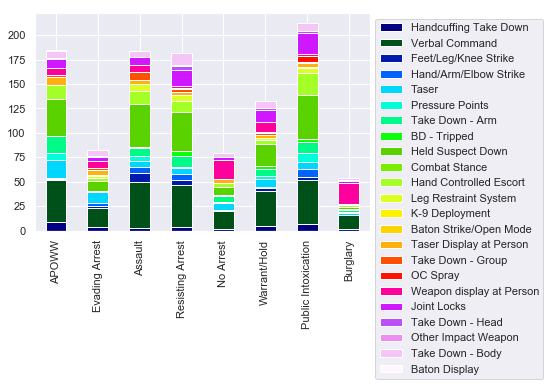

In [151]:
import matplotlib.colors as mcolors 
sns.set()
col = plt.cm.gist_ncar(np.linspace(0, 1, white_offense_force_counts.shape[1]))

#sns.color_palette("hls", white_offense_force_counts.shape[1])
white_top_eight_offenses = offenses_prop.sort_values("White", ascending = False)["White"].index[0:8]
white_offense_force_counts[white_offense_force_counts.index.isin(white_top_eight_offenses)].plot(kind = "bar", stacked = True, color = col);
plt.legend(bbox_to_anchor = (1, 1), loc = "best");

# Time of Arrest

In [ ]:
time = pd.to_datetime(race.INCIDENT_TIME).dt.strftime('%H:%M:%S')

In [ ]:
time.iloc[2329] == "NaT"

In [ ]:
race["hour"] = time.str.split(':').apply(lambda x: np.nan if x[0] == "NaT"
                                         else int(x[0]))
race.hour.head()

In [ ]:
grouped_hour = race.groupby(["SUBJECT_RACE", "hour"], as_index = False)["INCIDENT_TIME"].count()
grouped_hour

In [ ]:
sns.lineplot("hour", "INCIDENT_TIME", hue = "SUBJECT_RACE", data = grouped_hour);
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

# Force effectiveness

In [119]:
race["force_sep"] = race.force.str.split(",").apply(lambda x: [i for i in x if i != "nan"])
race["force_eff_sep"] = race.FORCE_EFFECTIVE.str.replace(" +", "").str.split(",")
(race.force_sep.apply(len) == race.force_eff_sep.apply(len)).sum() == race.shape[0]

True

In [120]:
type_of_force
for i in type_of_force:
    race[i + "_eff"] = 0

In [121]:
race.index = pd.Index(np.arange(race.shape[0]))
race.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343], dtype='int64', length=2344)

In [122]:
for i in np.arange(race.shape[0]):
    for j in np.arange(len(race.ix[i, "force_sep"])):
        if race.ix[i, "force_eff_sep"][j] == "Yes":
            race.ix[i, race.loc[i, "force_sep"][j] + "_eff"] = 1
#race.apply(lambda x: x[force_sep[i] + "_eff"])

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-i

In [123]:
race

INCIDENT_DATE INCIDENT_TIME SUBJECT_ID SUBJECT_RACE SUBJECT_GENDER SUBJECT_INJURY                                SUBJECT_INJURY_TYPE SUBJECT_WAS_ARRESTED         SUBJECT_DESCRIPTION                                    SUBJECT_OFFENSE LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION        INCIDENT_REASON          REASON_FOR_FORCE       TYPE_OF_FORCE_USED1       TYPE_OF_FORCE_USED2       TYPE_OF_FORCE_USED3     TYPE_OF_FORCE_USED4     TYPE_OF_FORCE_USED5    TYPE_OF_FORCE_USED6       TYPE_OF_FORCE_USED7 TYPE_OF_FORCE_USED8 TYPE_OF_FORCE_USED9 TYPE_OF_FORCE_USED10                                FORCE_EFFECTIVE OFFICER_ID  OFFICER_RACE OFFICER_YEARS_ON_FORCE                                              force  Handcuffing Take Down  Verbal Command  Pepperball Impact  Feet/Leg/Knee Strike  Hand/Arm/Elbow Strike  Taser  Pepperball Saturation  Pressure Points  Take Down - Arm  BD - Tripped  Held Suspect Down    nan  Baton Strike/Closed Mode  Combat Stance  Hand Controlled Escort   LVNR  \
0           9/3/16    4:14:00 AM      46424        Black         Female            Yes                            Non-Visible Injury/Pain                  Yes           Mentally unstable                                              APOWW                               211 N ERVAY ST                 Arrest                    Arrest     Hand/Arm/Elbow Strike                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes      10810         Black                      2  Hand/Arm/Elbow Strike,nan,nan,nan,nan,nan,nan,...                  False           False              False                 False                   True  False                  False            False            False         False              False   True                     False          False                   False  False   
1          3/22/16   11:00:00 PM      44324     Hispanic           Male             No                       No injuries noted or visible                  Yes           Mentally unstable                                              APOWW                             7647 FERGUSON RD                 Arrest                    Arrest               Joint Locks                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes       7706         White                     17    Joint Locks,nan,nan,nan,nan,nan,nan,nan,nan,nan                  False           False              False                 False                  False  False                  False            False            False         False              False   True                     False          False                   False  False   
2          5/22/16    1:29:00 PM      45126     Hispanic           Male             No                       No injuries noted or visible                  Yes                     Unknown                                              APOWW                             716 BIMEBELLA LN                 Arrest                    Arrest         Take Down - Group                       NaN                       NaN                     NaN                     NaN                    NaN                       NaN                 NaN                 NaN                  NaN                                            Yes      11014         Black                      1  Take Down - Group,nan,nan,nan,nan,nan,nan,nan,...                  False           False              False                 False                  False  False                  False            False            False         False              False   True                     False          False                   False  False   
3          1/10/16   

In [124]:
total_force = []
prop_force_eff = []
for i in type_of_force:
    total_force.append(race[i].sum()) 
    prop_force_eff.append(race[i + "_eff"].sum()/race[i].sum())
force_df = pd.DataFrame({"type_of_force": type_of_force, "count": total_force, "prop_eff": prop_force_eff})
force_df = force_df.sort_values("prop_eff", ascending = False)

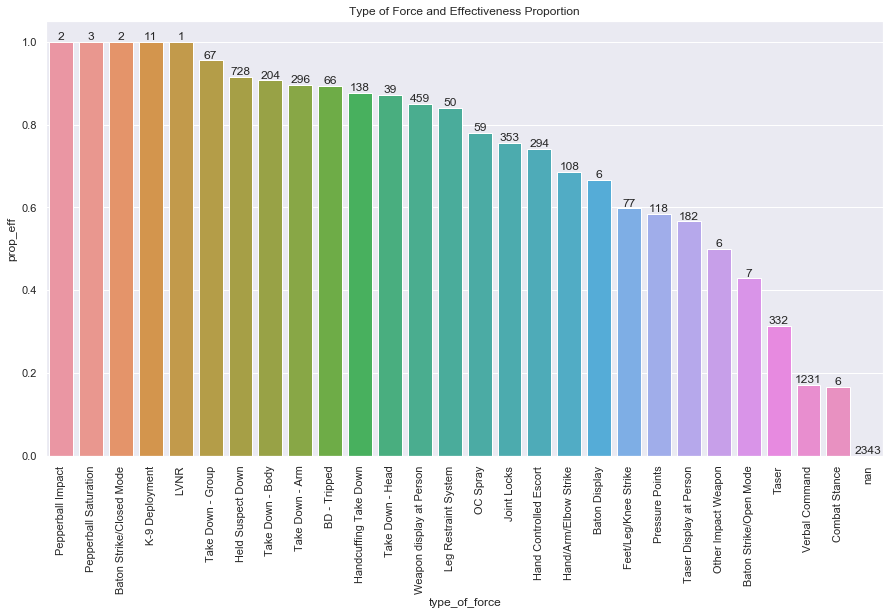

In [125]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "type_of_force", y = "prop_eff", data = force_df);
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

for i in range(len(ax.patches)):
    x = ax.patches[i].get_bbox().get_points()[:, 0]
    y = ax.patches[i].get_bbox().get_points()[1, 1]
    ax.annotate(f'{force_df["count"].iloc[i]}', (x.mean(), y), ha='center', va='bottom')
plt.title("Type of Force and Effectiveness Proportion");

### Officers and Arrests

In [41]:
race.groupby("OFFICER_ID")[]

1       10810
2        7706
3       11014
4        6692
5        9844
6        9855
7        9881
8        9058
9       10381
10       9705
11      10066
12      10224
13       9626
14      10355
15      10334
16       9215
17       8517
18      10701
19      10372
20      10130
21      10870
22      10503
23      11028
24      10724
25       7310
26       8862
27       5806
28       5273
29       5273
30       5806
31      10913
32       5485
33       9649
34      10824
35      11056
36      10846
37       7993
38      10586
39      10503
40       9180
45       9144
46       9949
47       9654
48      10969
49      10823
50       9762
51       8738
52      10710
53      10624
54       6798
55       6130
56       6798
57       6130
58      10313
59       8659
60       8659
61      10984
62       9931
63       6751
64       8287
65      10704
66      11022
67      10068
68       7539
69      11012
70      10697
71      10038
72      11119
73       6282
74       8759
75      10831
76    

### Is there one location where a lot of crime is happening? 

In [91]:
race.LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION.value_counts()

111 COMMERCE ST               25
7808 CLODUS FIELDS DR         21
111 W COMMERCE ST             21
10000 WALNUT ST               16
5200 HARRY HINES BLVD         12
1600 CHESTNUT ST              12
1818 CORSICANA ST             10
126 BUTTERCUP LN              10
205 S LAMAR ST                 9
200 SHORT BLVD                 9
1015 ELM ST                    8
1000 COMMERCE ST               8
911 MURDOCK RD                 8
1100 S SAINT PAUL ST           7
8008 HERB KELLEHER WAY         7
901 ELM ST                     7
3219 HARLANDALE AVE            7
4600 S MALCOLM X BLVD          7
2500 VICTORY AVE               7
10666 E NORTHWEST HWY          7
9601 FOREST LN                 6
2424 SWISS AVE                 6
7905 MARVIN D LOVE FWY         6
1010 ROSS AVE                  6
2944 N BUCKNER BLVD            6
9700 FOREST LN                 5
18625 MIDWAY RD                5
8687 N CENTRAL EXPY            5
3045 N BUCKNER BLVD            5
9690 FOREST LN                 5
500 S BUCK

A lot of arrests being made at 111 Commerce St 

In [92]:
commerce = race[(race.LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION == "111 COMMERCE ST") | (race.LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION == "111 W COMMERCE ST")].sort_values("INCIDENT_DATE")
commerce["INCIDENT_DATE"] = pd.to_datetime(commerce["INCIDENT_DATE"])
commerce


INCIDENT_DATE INCIDENT_TIME SUBJECT_ID SUBJECT_RACE SUBJECT_GENDER SUBJECT_INJURY                                SUBJECT_INJURY_TYPE SUBJECT_WAS_ARRESTED         SUBJECT_DESCRIPTION                                    SUBJECT_OFFENSE LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION        INCIDENT_REASON          REASON_FOR_FORCE     TYPE_OF_FORCE_USED1     TYPE_OF_FORCE_USED2       TYPE_OF_FORCE_USED3     TYPE_OF_FORCE_USED4     TYPE_OF_FORCE_USED5 TYPE_OF_FORCE_USED6 TYPE_OF_FORCE_USED7 TYPE_OF_FORCE_USED8 TYPE_OF_FORCE_USED9 TYPE_OF_FORCE_USED10          FORCE_EFFECTIVE                                              force  Detention/Frisk  Pressure Points  Pepperball Saturation  Hand/Arm/Elbow Strike  Verbal Command   LVNR  Held Suspect Down  Danger to self or others  Take Down - Arm  Assault to Other Person  Hand Controlled Escort  Joint Locks  Crowd Disbursement  Property Destruction  Pepperball Impact  Other  Feet/Leg/Knee Strike  Barricaded Person  Combat Stance  \
2191    2016-01-01    2:24:00 AM      42982        Black           Male            Yes                                    Abrasion/Scrape                  Yes  Alchohol and unknown drugs                        DWI, Assault/Public Servant                              111 COMMERCE ST                 Arrest         Active Aggression            BD - Grabbed            BD - Tripped    Hand Controlled Escort          Verbal Command       Held Suspect Down                 NaN                 NaN                 NaN                 NaN                  NaN   Yes, Yes, Yes, No, Yes  Active Aggression BD - Grabbed BD - Tripped Ha...            False            False                  False                  False            True  False               True                     False            False                    False                    True        False               False                 False              False  False                 False              False          False   
2329    2016-01-22    1:45:00 AM      43306        Black           Male             No                       No injuries noted or visible                   No                     Unknown  DWLI, Resisting Search and Transport, Drug Pos...                              111 COMMERCE ST                 Arrest         Aggressive Animal          Verbal Command            BD - Grabbed              BD - Grabbed                     NaN                     NaN                 NaN                 NaN                 NaN                 NaN                  NaN              No, No, Yes  Aggressive Animal Verbal Command BD - Grabbed ...            False            False                  False                  False            True  False              False                     False            False                    False                   False        False               False                 False              False  False                 False              False          False   
2192    2016-01-22    1:45:00 AM      43306        Black           Male             No                       No injuries noted or visible                  Yes                     Unknown  DWLI, Resisting Search and Transport, Drug Pos...                              111 COMMERCE ST                 Arrest                    Arrest          Verbal Command            BD - Grabbed           Pressure Points                     NaN                     NaN                 NaN                 NaN                 NaN                 NaN                  NaN              No, No, Yes  Arrest Verbal Command BD - Grabbed Pressure Po...            False             True                  False                  False            True  False              False                     False            False                    False                   False        False               False                 False              False  False                 False              False          False   
262     2016-10-22    5:00:00 AM      47089     Hispanic         

In [93]:
commerce["INCIDENT_DATE"].dt.month.value_counts()

8     8
4     8
10    7
6     5
2     5
7     4
1     3
9     2
5     2
3     2
Name: INCIDENT_DATE, dtype: int64

Seems to be a lot of activity on August, April, and October. 